In [1]:
import sys 
from classes import DataInfo

import numpy as np
import pandas as pd
import geopandas as gpd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


ModuleNotFoundError: No module named 'classes'

In [182]:
#Primer dataset
disorders = pd.read_csv('data/prevalence-by-mental-and-substance-use-disorder.csv')
a = DataInfo(disorders)
a.clean()
disorders.columns= ['Country', 'Year', 'Schizophrenia', 'Bipolar','ED', 'Anxiety','Drugs', 'Depression','Alcohol']
a_cont = a.dfcont()
a_inc = a.dfincome()

#Segundo dataset
depresion = pd.read_csv('data/share-with-depression.csv')
b = DataInfo(depresion)
b.clean()
depresion.columns= ['Country', 'Year','Dep_prev']
b_cont = b.dfcont()
b_inc = b.dfincome()

#Tercer dataset
depresion_sex = pd.read_csv('data/prevalence-of-depression-males-vs-females.csv')
c = DataInfo(depresion_sex)
c.clean()
depresion_sex.drop(columns=['Continent','Population (historical estimates)'], inplace=True)
depresion_sex.columns= ['Country', 'Year','Male_dep', 'Female_dep']
depresion_sex.dropna(inplace=True)

c_cont = c.dfcont()
c_inc = c.dfincome()


#Cuarto dataset
total = pd.read_csv('data/share-with-mental-and-substance-disorders.csv')
d = DataInfo(total)
d.clean()
total.columns= ['Country', 'Year', 'Total_prev']
d_cont = d.dfcont()
d_inc = d.dfincome()

#Quinto dataset
total_sex = pd.read_csv('data/share-with-mental-or-substance-disorders-by-sex.csv')
e = DataInfo(total_sex)
e.clean()
total_sex.drop(columns=['Continent','Population (historical estimates)'], inplace=True)
total_sex.columns= ['Country', 'Year', 'Male_total', 'Female_total']
total_sex.dropna(inplace=True)


# Relacionamos los datasets agrupados por continente
df_cont = pd.merge(a_cont, b_cont)
df_cont = pd.merge(df_cont, c_cont)
df_cont = pd.merge(df_cont, d_cont)

# Relacionados los datasets agrupados por ingresos
df_inc = pd.merge(a_inc, b_inc)
df_inc = pd.merge(df_inc, c_inc)
df_inc = pd.merge(df_inc, d_inc)


In [183]:
df_cont = pd.merge(a_cont, b_cont)
df_cont = pd.merge(df_cont, c_cont)
df_cont = pd.merge(df_cont, d_cont)

In [4]:
df_cont

,Continent,Year,Schizophrenia,Bipolar,ED,Anxiety,Drugs,Depression,Alcohol,Dep_prev,Male_dep,Female_dep,Total_prev
0,African Region (WHO),1990,0.216352,0.581938,0.102983,3.537832,0.437110,4.725167,1.152445,4.725167,3.844021,5.576728,12.411191
1,African Region (WHO),1991,0.216379,0.582026,0.102086,3.535734,0.440948,4.715682,1.152155,4.715682,3.836439,5.565375,12.413391
2,African Region (WHO),1992,0.216394,0.582084,0.101291,3.533891,0.444273,4.706978,1.148381,4.706978,3.830065,5.554457,12.415239
3,African Region (WHO),1993,0.216392,0.582137,0.100536,3.532413,0.446924,4.699633,1.143184,4.699633,3.825478,5.544718,12.417944
4,African Region (WHO),1994,0.216365,0.582201,0.099860,3.531429,0.448519,4.696143,1.140921,4.696143,3.822731,5.540255,12.423707
...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,Western Pacific Region (WHO),2015,0.324890,0.272669,0.143719,3.349340,0.642979,2.870449,1.194855,2.870449,2.239629,3.484633,11.195751
176,Western Pacific Region (WHO),2016,0.327911,0.272842,0.147809,3.394425,0.671333,2.870915,1.208224,2.870915,2.239556,3.485687,11.230811
177,Western Pacific Region (WHO),2017,0.330952,0.272996,0.151235,3.442034,0.701439,2.870767,1.225461,2.870767,2.240424,3.484493,11.268919
178,Western Pacific Region (WHO),2018,0.330982,0.273171,0.153276,3.441231,0.706279,2.870745,1.238534,2.870745,2.242757,3.481843,11.261979


In [5]:
df_cont 

NameError: name 'df_cont' is not defined

In [8]:
plot_df = (df_cont
               .groupby('Continent')
               .mean()
               .reset_index()
               .drop(columns=['Year'])
               .melt(id_vars='Continent')
          )

In [9]:
plot_df

,Continent,variable,value
0,African Region (WHO),Schizophrenia,0.217597
1,Eastern Mediterranean Region (WHO),Schizophrenia,0.264002
2,European Region (WHO),Schizophrenia,0.296587
3,Region of the Americas (WHO),Schizophrenia,0.362365
4,South-East Asia Region (WHO),Schizophrenia,0.287708
...,...,...,...
61,Eastern Mediterranean Region (WHO),Total_prev,14.979485
62,European Region (WHO),Total_prev,13.656202
63,Region of the Americas (WHO),Total_prev,15.162011
64,South-East Asia Region (WHO),Total_prev,13.352321


In [38]:
%pip install -U kaleido

Note: you may need to restart the kernel to use updated packages.


In [5]:
import os

if not os.path.exists("images"):
    os.mkdir("images")

In [184]:
plot_df = (df_cont
               .groupby('Continent')
               .mean()
               .reset_index()
               .drop(columns=['Year', 'Dep_prev', 'Male_dep', 'Female_dep'])
               .melt(id_vars='Continent')
          )


fig = px.bar(plot_df, x='variable', y='value',
             color='Continent', barmode='group',
             title='Salud mental por continentes')

fig.update_layout(    
    yaxis_title='Prevalencia en %',
    xaxis_title='',
    legend_title='Continentes',
    font_size=14,
)
fig.show()

fig.write_image("images/fig1.png", bbox_inches='tight')


TypeError: write_image() got an unexpected keyword argument 'bbox_inches'

In [56]:
disorders

,Country,Year,Schizophrenia,Bipolar,ED,Anxiety,Drugs,Depression,Alcohol
0,Afghanistan,1990,0.228979,0.721207,0.131001,4.835127,0.454202,5.125291,0.444036
1,Afghanistan,1991,0.228120,0.719952,0.126395,4.821765,0.447112,5.116306,0.444250
2,Afghanistan,1992,0.227328,0.718418,0.121832,4.801434,0.441190,5.106558,0.445501
3,Afghanistan,1993,0.226468,0.717452,0.117942,4.789363,0.435581,5.100328,0.445958
4,Afghanistan,1994,0.225567,0.717012,0.114547,4.784923,0.431822,5.099424,0.445779
...,...,...,...,...,...,...,...,...,...
6835,Zimbabwe,2015,0.209359,0.560882,0.099610,3.315701,0.599604,3.548613,1.734969
6836,Zimbabwe,2016,0.209979,0.561768,0.100821,3.324230,0.603658,3.557508,1.689281
6837,Zimbabwe,2017,0.210631,0.562612,0.101671,3.330569,0.608096,3.564138,1.651805
6838,Zimbabwe,2018,0.211237,0.563283,0.102398,3.317500,0.609065,3.563141,1.686711


In [12]:

disorders_year = (disorders
     .groupby('Year')
     .sum()
     .reset_index()
)
disorders_year = (disorders_year
                        .melt(id_vars='Year')
                        .rename(columns={'variable':'disorder', 'value':'share'})
                )

fig = px.line(disorders_year, x='Year', y='share', color='disorder', markers=True,
             title="Salud mental a lo largo del tiempo")

fig.update_layout(    
    yaxis_title="Prevalencia en %",
    xaxis_title="Año",
    legend_title='Trastornos mentales',
    font_size=18,
)
fig.show()
fig.write_image("images/fig2.png")


In [76]:
df_inc

,Income,Year,Schizophrenia,Bipolar,ED,Anxiety,Drugs,Depression,Alcohol,Dep_prev,Male_dep,Female_dep,Total_prev
0,World Bank High Income,1990,0.349837,0.786395,0.390832,5.080294,1.377799,3.728780,2.238104,3.728780,2.910869,4.491153,14.357230
1,World Bank High Income,1991,0.351302,0.787030,0.397064,5.081799,1.394368,3.743666,2.219053,3.743666,2.919939,4.512909,14.387759
2,World Bank High Income,1992,0.352642,0.787801,0.402772,5.084536,1.410451,3.761546,2.199737,3.761546,2.931513,4.537947,14.421124
3,World Bank High Income,1993,0.353803,0.788598,0.407782,5.087854,1.425537,3.781520,2.181322,3.781520,2.945393,4.564693,14.455324
4,World Bank High Income,1994,0.354764,0.789333,0.411640,5.091523,1.438795,3.802907,2.164989,3.802907,2.961282,4.592139,14.488410
...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,World Bank Upper Middle Income,2015,0.308526,0.475078,0.164308,4.093712,0.706593,3.329720,1.514542,3.329720,2.555914,4.066753,12.436956
116,World Bank Upper Middle Income,2016,0.310809,0.477434,0.168254,4.138800,0.725803,3.331579,1.511265,3.331579,2.559298,4.067300,12.481145
117,World Bank Upper Middle Income,2017,0.313086,0.479685,0.171563,4.185851,0.746686,3.332059,1.511673,3.332059,2.562882,4.064821,12.525723
118,World Bank Upper Middle Income,2018,0.312974,0.481878,0.173578,4.192571,0.748686,3.330413,1.517199,3.330413,2.564021,4.060546,12.526063


In [186]:
a = disorders.corr()
a.drop(columns='Year', inplace=True)

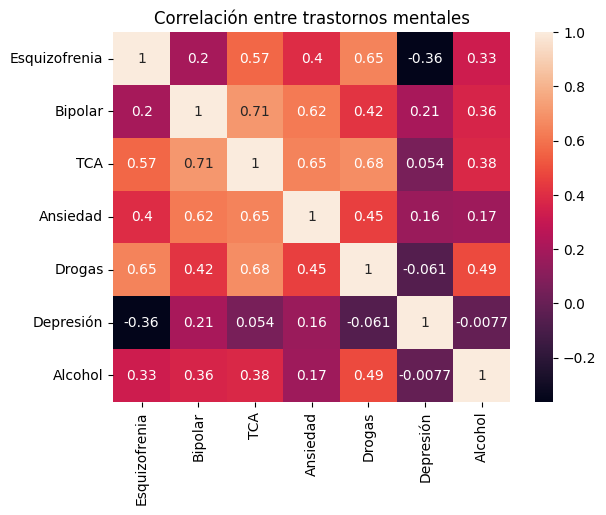

In [187]:
axis_labels = ['Esquizofrenia', 'Bipolar', 'TCA', 'Ansiedad', 'Drogas', 'Depresión', 'Alcohol'] # labels for x-axis
ax = plt.axes()
ax.set_title('Correlación entre trastornos mentales')
plt.xticks(rotation=-45);

heatmap = sns.heatmap(a[1:], ax=ax, xticklabels=axis_labels, yticklabels=axis_labels, annot=True)
plt.show()
fig = heatmap.get_figure()
fig.savefig("images/fig3.png", bbox_inches='tight')


In [34]:
df_inc = pd.merge(a_inc, b_inc)
df_inc = pd.merge(df_inc, c_inc)
df_inc = pd.merge(df_inc, d_inc)


In [58]:
total_sex.dropna(inplace=True)

,Country,Year,Male_total,Female_total
1,Afghanistan,1990,17.448695,17.634233
2,Afghanistan,1991,17.771263,17.873184
3,Afghanistan,1992,18.051575,18.092318
4,Afghanistan,1993,18.275848,18.265196
5,Afghanistan,1994,18.427490,18.383394
...,...,...,...,...
56392,Zimbabwe,2013,12.495983,10.687594
56393,Zimbabwe,2014,12.512582,10.698576
56394,Zimbabwe,2015,12.529954,10.709341
56395,Zimbabwe,2016,12.546594,10.728702


In [45]:
df_inc

,Income,Year,Schizophrenia,Bipolar,ED,Anxiety,Drugs,Depression,Alcohol,Dep_prev,Male_dep,Female_dep,Total_prev
0,World Bank High Income,1990,0.349837,0.786395,0.390832,5.080294,1.377799,3.728780,2.238104,3.728780,2.910869,4.491153,14.357230
1,World Bank High Income,1991,0.351302,0.787030,0.397064,5.081799,1.394368,3.743666,2.219053,3.743666,2.919939,4.512909,14.387759
2,World Bank High Income,1992,0.352642,0.787801,0.402772,5.084536,1.410451,3.761546,2.199737,3.761546,2.931513,4.537947,14.421124
3,World Bank High Income,1993,0.353803,0.788598,0.407782,5.087854,1.425537,3.781520,2.181322,3.781520,2.945393,4.564693,14.455324
4,World Bank High Income,1994,0.354764,0.789333,0.411640,5.091523,1.438795,3.802907,2.164989,3.802907,2.961282,4.592139,14.488410
...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,World Bank Upper Middle Income,2015,0.308526,0.475078,0.164308,4.093712,0.706593,3.329720,1.514542,3.329720,2.555914,4.066753,12.436956
116,World Bank Upper Middle Income,2016,0.310809,0.477434,0.168254,4.138800,0.725803,3.331579,1.511265,3.331579,2.559298,4.067300,12.481145
117,World Bank Upper Middle Income,2017,0.313086,0.479685,0.171563,4.185851,0.746686,3.332059,1.511673,3.332059,2.562882,4.064821,12.525723
118,World Bank Upper Middle Income,2018,0.312974,0.481878,0.173578,4.192571,0.748686,3.330413,1.517199,3.330413,2.564021,4.060546,12.526063


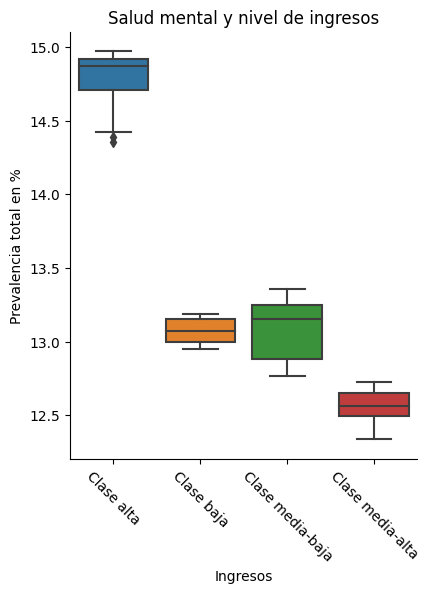

In [179]:
x_labels = ['Clase alta', 'Clase baja', 'Clase media-baja', 'Clase media-alta'] # labels for x-axis

sns.catplot(x="Income", y="Total_prev", kind="box", data=df_inc);
plt.title('Salud mental y nivel de ingresos')
plt.xticks(ticks=[0,1,2,3],labels=x_labels,rotation=-45)
plt.xlabel('Ingresos')
plt.ylabel('Prevalencia total en %');
plt.savefig('images/fig4.png', bbox_inches='tight')

In [100]:
depresion_sex['Male_dep'].mean()

3.153389240158962

In [101]:
depresion_sex['Female_dep'].mean()

4.7094972299120474

In [106]:
df_cont.groupby('Continent').describe()['Male_dep']['mean']

Continent
African Region (WHO)                  3.836878
Eastern Mediterranean Region (WHO)    3.458530
European Region (WHO)                 3.032824
Region of the Americas (WHO)          2.900099
South-East Asia Region (WHO)          3.149410
Western Pacific Region (WHO)          2.317485
Name: mean, dtype: float64

In [107]:
df_cont

,Continent,Year,Schizophrenia,Bipolar,ED,Anxiety,Drugs,Depression,Alcohol,Dep_prev,Male_dep,Female_dep,Total_prev
0,African Region (WHO),1990,0.216352,0.581938,0.102983,3.537832,0.437110,4.725167,1.152445,4.725167,3.844021,5.576728,12.411191
1,African Region (WHO),1991,0.216379,0.582026,0.102086,3.535734,0.440948,4.715682,1.152155,4.715682,3.836439,5.565375,12.413391
2,African Region (WHO),1992,0.216394,0.582084,0.101291,3.533891,0.444273,4.706978,1.148381,4.706978,3.830065,5.554457,12.415239
3,African Region (WHO),1993,0.216392,0.582137,0.100536,3.532413,0.446924,4.699633,1.143184,4.699633,3.825478,5.544718,12.417944
4,African Region (WHO),1994,0.216365,0.582201,0.099860,3.531429,0.448519,4.696143,1.140921,4.696143,3.822731,5.540255,12.423707
...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,Western Pacific Region (WHO),2015,0.324890,0.272669,0.143719,3.349340,0.642979,2.870449,1.194855,2.870449,2.239629,3.484633,11.195751
176,Western Pacific Region (WHO),2016,0.327911,0.272842,0.147809,3.394425,0.671333,2.870915,1.208224,2.870915,2.239556,3.485687,11.230811
177,Western Pacific Region (WHO),2017,0.330952,0.272996,0.151235,3.442034,0.701439,2.870767,1.225461,2.870767,2.240424,3.484493,11.268919
178,Western Pacific Region (WHO),2018,0.330982,0.273171,0.153276,3.441231,0.706279,2.870745,1.238534,2.870745,2.242757,3.481843,11.261979


In [171]:
c_cont.rename(columns={'Male_dep':'Hombres',
                        'Female_dep': 'Mujeres'}, inplace=True)

In [172]:
depsex = (c_cont.drop(columns='Year')
                        .melt(id_vars='Continent')
                        .rename(columns={'variable':'Género', 'value':'share'})
                )

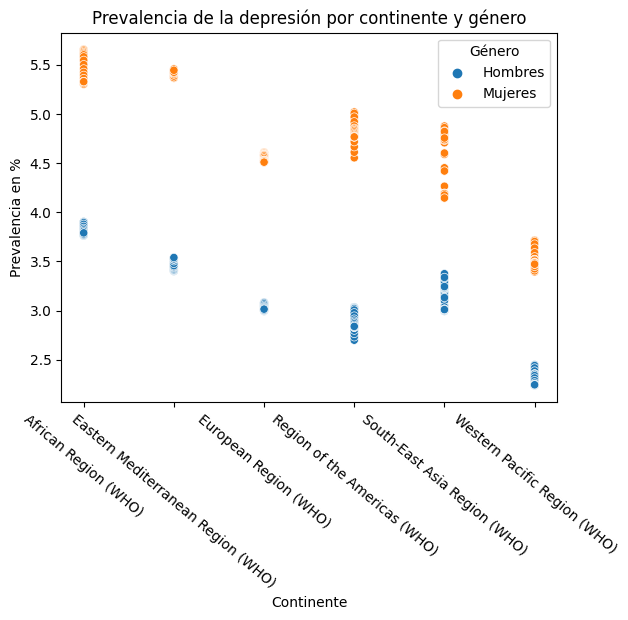

In [178]:

fig, ax = plt.subplots()
ax.set_title('Prevalencia de la depresión por continente y género')
ax.set_xlabel('Continente')
ax.set_ylabel('Prevalencia en %')


plt.xticks(rotation=-40)


sns.scatterplot(data=depsex, x='Continent', y='share', hue='Género', ax=ax)
plt.savefig('images/fig5.png', bbox_inches='tight')